<center>
<a href="https://uv.bf/" target="_parent"><img src="logo.png" alt="" width="200" height="240"/></a>
</center>

### Master en fouille de données et intelligence artificielle</h2>

### Projet de NLP : classification des tweets à caractere haineux

![](sentiment2.png)

Notre travail consiste évaluer les caractères haineux dans les textes sur la plate de tweeter, nous allons parcourir la base de données des échanges cette plateforme afin identifier des sentiments haineux. pour y arriver, nous alons de façons spécifique :

Telecharger ou importer les bases de données
Suivre la demarche de traitement du natural langage processing
Evaluer le score global de sentiments dans le texte

De façon methodique, nous allons attribuer à une chaîne de texte (les sweets) d'une note comprise entre 0 et 1, où 0 représente un sentiment négatif et 1 un sentiment positif


Exemple de sentiments : 

La meilleure danceuse que j'aie jamais vu et un habillement seduisant 
Ce restaurant n'a servi du dégueulasse qui empoissonné ma journée 

Pour entraîner un modèle d'analyse des sentiments, nous utiliserons un ensemble de données contenant des chaînes de texte étiquetées avec des 0 (pour les sentiments négatifs) et des 1 (pour les sentiments positifs).

## IMPORT

In [17]:
import pandas as pd

## 1. Load the DATABASE

In [25]:
data = pd.read_csv('Data/train.csv', encoding="ISO-8859-1")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [26]:
data['sentiment'] = data['label']
#data.groupby('sentiment').describe()

## 2. Pre-Processing

In [27]:
data = data.drop_duplicates()
data.groupby('sentiment').describe()

id                                                     \
             count          mean          std   min      25%      50%   
sentiment                                                               
0          29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5   
1           2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0   

                                label                                     
                75%      max    count mean  std  min  25%  50%  75%  max  
sentiment                                                                 
0          23965.25  31962.0  29720.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1          24022.00  31961.0   2242.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

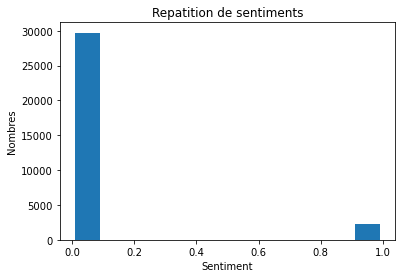

In [46]:
import matplotlib.pyplot as plt

plt.hist(data['sentiment'], rwidth=0.8)  # Création de l'histogramme
plt.xlabel('Sentiment')
plt.ylabel('Nombres')
plt.title("Repatition de sentiments")
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(data['tweet'])
y = data['sentiment']

## 3. Pipeline

## 4. Model training

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0) 

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

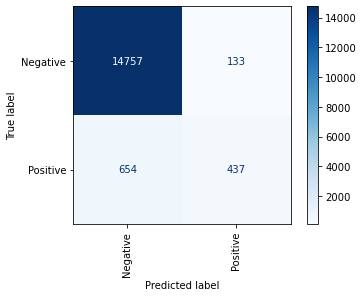

In [31]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

Le modèle a correctement identifié 14757 avis négatifs et s'est trompé dans 654 cas. Il a identifié correctement 437 critiques positives et s'est trompé 133 fois. Utilisez la méthode des scores pour obtenir une mesure approximative de la précision du modèle.

## 5. Evaluations

In [32]:
model.score(x_test, y_test)

0.9507540203992241

In [33]:
from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9213191882543479